In [ ]:
# this gives access to files in drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(96, 112, 96)


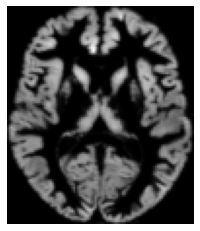

In [ ]:
# this is how to show an MRI from my googledrive

import numpy as np
import matplotlib.pyplot as plt

data = np.load('/content/drive/My Drive/Colab Notebooks/CC110033.npy')
print(data.shape)
plt.axis('off')
plt.imshow(data[:,:,48].T, cmap='gray', origin='lower')

In [ ]:
import os #for directory operations
import pandas as pd
import numpy as np

data_dir = '/content/drive/My Drive/Colab Notebooks/'
mris = os.listdir(data_dir)
print(mris)
labels_df = pd.read_table('/content/drive/My Drive/CC700_mt.txt', engine ='python', sep='\t')
labels_df.head()
# np.save('ages.npy', labels_df.age)

['CC110037.npy', 'CC110033.npy', 'CC110045.npy', 'CC110056.npy', 'CC110062.npy', 'CC110069.npy', 'CC110098.npy', 'CC110087.npy', 'CC110101.npy', 'CC110126.npy', 'CC110174.npy', 'CC110182.npy', 'CC110187.npy', 'CC110319.npy', 'CC110411.npy', 'CC112141.npy', 'CC110606.npy', 'CC120008.npy', 'CC120049.npy', 'CC120061.npy', 'CC120065.npy', 'CC120120.npy', 'CC120123.npy', 'CC120166.npy', 'CC120182.npy', 'CC120208.npy', 'CC120218.npy', 'CC120234.npy', 'CC120264.npy', 'CC120276.npy', 'CC120286.npy', 'CC120309.npy', 'CC120313.npy', 'CC120319.npy', 'CC120347.npy', 'CC120376.npy', 'CC120462.npy', 'CC120409.npy', 'CC120469.npy', 'CC120550.npy', 'CC120470.npy', 'CC120640.npy', 'CC120727.npy', 'CC120795.npy', 'CC120764.npy', 'CC120816.npy', 'CC120987.npy', 'CC121106.npy', 'CC121144.npy', 'CC121111.npy', 'cam-can statistics']


,SubCCIDc,SubMEGIDc,SubCBUIDc,Genderc,Age,Agec,GenderCodec,SubjectData_1,SubjectData_2,SubjectData_3,SubjectData_4,SubjectData_5,SubjectData_6,GenderNum,SessionA,SessionB,SessionC,SessionD,CCid,BentonFaces_TotalScore,CardioMeasures_height,CardioMeasures_weight,CardioMeasures_bp_dia_mean,CardioMeasures_bp_sys_mean,Cattell_SubScore1,Cattell_SubScore2,Cattell_SubScore3,Cattell_SubScore4,Cattell_TotalScore,Hotel_Time,Proverbs_Score,RTchoice_RTmean_all,RTchoice_RTmedian_all,RTchoice_RTsd_all,RTchoice_RTtrim3mean_all,RTsimple_RTmean,RTsimple_RTcv,RTsimple_RTmedian,RTsimple_RTsd,RTsimple_RTtrim3mean,...,HADS_anx_category,HADS_dep_category,story_recognition,STW_total,qual,attention_orientation,memory,fluencies,language,visuospatial,acer,C1,C2,C3,C4,C5,C6,C7,hours_slept,hours_in_bed,sleep_efficiency,psqi,SC_r,SEG_r,SC_pt,SEG_pt,ccids,cbuids,age,gender2,pox_meanHR,pox_sdHR,pox_lf,pox_hf,pox_rmssd,ecg_meanHR,ecg_sdHR,ecg_rmssd,ecg_lf,ecg_hf
0,CC110033,meg12_0303,CBU120746,MALE,24,24,1,CC110033,MALE,1,24,CBU120746,NaN,1,NaN,NaN,NaN,NaN,CC110033,20.0,179.0,60.0,66.0,111.5,12.0,11.0,11.0,8.0,42.0,206.62,5.0,0.474851,0.453270,0.152684,0.457883,0.302018,0.141967,0.286336,0.042876,0.302018,...,Normal,Normal,10.0,51.0,Degree,18.0,24.0,13.0,26.0,16.0,97.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,8.5,94.0,1.0,-,17,II,5.1,CC110033,CBU120746,24.147945,1.0,54.5,4.3,1461.80,3300.58,94.9,53.3,4.8,78.3,1339.14,2628.90
1,CC110037,meg11_0153,CBU110544,MALE,18,18,1,CC110037,MALE,1,18,CBU110544,NaN,1,NaN,NaN,NaN,NaN,CC110037,21.0,NaN,NaN,NaN,NaN,10.0,8.0,8.0,4.0,30.0,208.72,6.0,0.500034,0.483496,0.109232,0.500034,0.348958,0.420743,0.285773,0.146822,0.316450,...,Normal,Normal,9.0,55.0,A-level,18.0,26.0,14.0,26.0,16.0,100.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,10.0,11.0,91.0,4.0,-,17,NaN,NaN,CC110037,CBU110544,18.750685,1.0,61.4,4.2,703.99,2148.10,77.1,65.5,4.5,52.1,778.68,1203.87
2,CC110045,meg11_0176,CBU111116,FEMALE,24,24,2,CC110045,FEMALE,2,24,CBU111116,NaN,2,NaN,NaN,NaN,NaN,CC110045,23.0,162.8,57.4,63.5,90.5,12.0,11.0,10.0,8.0,41.0,141.76,5.0,0.459115,0.423188,0.155199,0.436937,0.310046,0.256992,0.285886,0.079679,0.301420,...,Normal,Normal,10.0,50.0,Degree,18.0,26.0,14.0,26.0,16.0,100.0,1.0,NaN,0.0,1.0,1.0,0.0,0.0,8.0,9.5,84.0,NaN,IIIN,6,NaN,NaN,CC110045,CBU111116,24.528767,2.0,52.5,7.9,2475.40,11201.39,207.3,NaN,NaN,NaN,NaN,NaN
3,CC110056,meg11_0151,CBU110547,FEMALE,22,22,2,CC110056,FEMALE,2,22,CBU110547,NaN,2,NaN,CBU140153,CBU140224,NaN,CC110056,25.0,NaN,NaN,NaN,NaN,9.0,5.0,9.0,1.0,24.0,299.12,1.0,0.682312,0.662136,0.234183,0.669139,0.402969,0.303768,0.368597,0.122409,0.390646,...,Normal,Normal,10.0,49.0,Degree,17.0,26.0,12.0,26.0,14.0,95.0,1.0,0.0,1.0,3.0,1.0,0.0,0.0,7.0,11.0,64.0,6.0,-,17,NaN,NaN,CC110056,CBU110547,22.687671,2.0,63.1,9.4,5105.38,11208.36,160.7,63.5,7.5,123.6,2002.82,7328.59
4,CC110062,NaN,CBU110468,MALE,20,20,1,CC110062,MALE,1,20,CBU110468,NaN,1,NaN,NaN,NaN,NaN,CC110062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.410328,0.394200,0.070195,0.405506,0.347116,0.576535,0.286475,0.200124,0.320483,...,Normal,Normal,9.0,54.0,A-level,18.0,23.0,14.0,26.0,16.0,97.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,7.0,7.0,100.0,6.0,IIIN,6,IIIN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# this block converts the file CC700_mt.txt into .npy by selecting all the ages where the SubCCIDc matches the list of sample MRIs and adding them to an age list which gets converted into .npy
age = []
mri_array = []

for mri in mris:
  mri_as_array = np.load('/content/drive/My Drive/Colab Notebooks/' + mri) #loads each mri as array before adding to array of all mris
  mri_array.append(mri_as_array)  #adds each npy mri file to an array called mri_array
  label = labels_df.loc[labels_df.SubCCIDc == os.path.splitext(mri)[0], 'Age'].iloc[0]
  age.append(label)

np.save('/content/drive/My Drive/ages.npy', age)
np.save('/content/drive/My Drive/mris.npy', mri_array)


ValueError: ignored

In [ ]:
# list containing all the ages for the mris
ages = np.load('/content/drive/My Drive/ages.npy')
print(ages)

# list containing all the mris
mris = np.load('/content/drive/My Drive/mris.npy')
print(mris)

[18 24 24 22 20 28 23 28 23 22 25 18 25 28 25 29 20 26 28 19 25 25 19 28
 26 24 27 24 28 23 22 27 28 27 21 18 18 18 25 19 28 26 23 24 27 23 20 28
 26 18]
[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  ...

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. 

The following chunck cleans up the data and ensures it is in the correct format
Train_test_split is used for cross_validation, it from given data, it divides into 80/20 train/test as per test_size(0.2)
Then reshape to make sure everything is in the correct shape
Lastly the for loop displays some images with their corresponding chronological ages

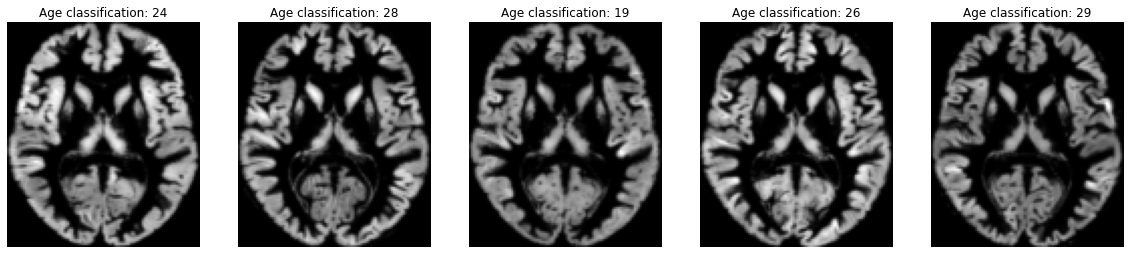

In [ ]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import keras
from keras.utils import to_categorical 
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Conv3D, MaxPooling3D, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import ReLU
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils import plot_model

ages
mris

#  1. clean up data and ensure in correct format
# print(mris.shape)
# print(ages.shape)
X_train, X_test, y_train, y_test = train_test_split(mris, ages, test_size = 0.2, random_state=13)
X_train = X_train.reshape(-1, 96, 112, 96, 1)
X_test = X_test.reshape(-1, 96, 112, 96, 1)
# print(len(X_train))
# print(y_train)

# fig, axes = plt.subplots(1,2)
# axes[0].axis('off')
# axes[0].imshow(X_train[14, :, :, 48, 0].T, cmap='gray', origin='lower')
# axes[0].title.set_text("Age classification: {}".format(y_train[14]))
# axes[1].axis('off')
# axes[1].imshow(X_train[4, :, :, 48, 0].T, cmap='gray', origin='lower')
# axes[1].title.set_text("Age classification: {}".format(y_train[4]))

fig, axes = plt.subplots(1,5, figsize=(20,20))
for i in range(5):
  axes[i].imshow(X_train[i, :, :, 48, 0].T, cmap='gray', origin='lower')
  axes[i].title.set_text("Age classification: {}".format(y_train[i]))
  axes[i].axis('off')


This block is the real CNN

In [ ]:
def brain_age_prediction_model(batch_size = 4, epochs = 10):
  model = Sequential()
  model.add(Conv3D(32, kernel_size = (3,3,3), padding = 'same', input_shape = X_train[0].shape))
  # model.add(MaxPooling3D((2,2,2), strides=2, padding = 'same'))

  model.add(Conv3D(64, (3,3,3), activation = 'relu', padding = 'same'))
  model.add(BatchNormalization(axis=4))
  model.add(MaxPooling3D((2,2,2), strides=2, padding = 'same'))

  model.add(Conv3D(128, (3,3,3), activation = 'relu', padding = 'same'))
  model.add(BatchNormalization(axis=4))
  model.add(MaxPooling3D((2,2,2), strides=2, padding = 'same'))

  model.add(Conv3D(128, (3,3,3), activation = 'relu', padding = 'same'))
  model.add(BatchNormalization(axis=4))
  model.add(MaxPooling3D((2,2,2), strides=2, padding = 'same'))

  model.add(Conv3D(256, (3,3,3), activation = 'relu', padding = 'same'))
  model.add(BatchNormalization(axis = 4))
  model.add(MaxPooling3D((2,2,2), strides=2, padding = 'same'))

  model.add(Flatten())

  model.add(Dense(256, activation='relu'))
  model.add(Dense(64, activation='relu'))

  model.add(Dense(1))

  model.summary()
  plot_model(model, to_file='dinsdaleish.png')

  model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mse', 'mae'])
  trained_model = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_test, y_test))

  test_eval = model.evaluate(X_test, y_test)

  print('Loss: ', test_eval[0])
  print('Mean Squared Error: ', test_eval[1])
  print('Mean Absolute Error: ', test_eval[2])

  # plotting results
  mse = trained_model.history['mse']
  val_mse = trained_model.history['val_mse']
  mae = trained_model.history['mae']
  val_mae = trained_model.history['val_mae']
  loss = trained_model.history['loss']
  val_loss = trained_model.history['val_loss']
  epochs = range(len(mse))
  
  plt.plot(epochs, mse, 'bo', label='Training MSE')
  plt.plot(epochs, val_mse, 'b', label='Val MSE')
  plt.title('Mean Square Error (MSE)')
  plt.xlabel('Epochs')
  plt.ylabel('MSE')
  plt.legend()        
  plt.savefig('mris_mse.png')

  plt.figure()
  plt.plot(epochs, mae, 'bo', label='Training MAE')
  plt.plot(epochs, val_mae, 'b', label='Validation MAE')
  plt.title('Mean Absolute Error (MAE)')
  plt.xlabel('Epochs')
  plt.ylabel('MAE')
  plt.legend()
  plt.savefig('mris_mae.png')

  
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Loss evaluation')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.savefig('mris_loss.png')

  return trained_model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 96, 112, 96, 32)   896       
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 96, 112, 96, 64)   55360     
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 112, 96, 64)   256       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 48, 56, 48, 64)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 48, 56, 48, 128)   221312    
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 56, 48, 128)   512       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 24, 28, 24, 128)   0

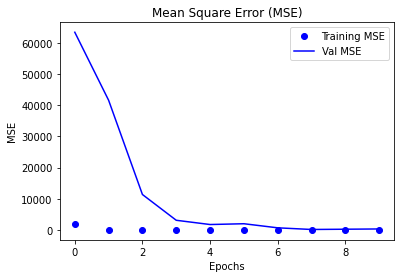

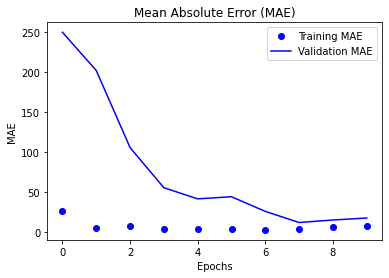

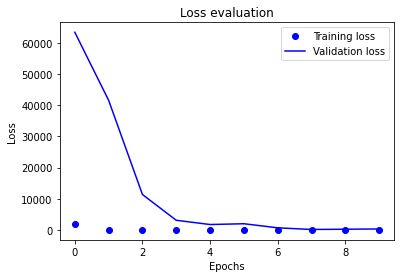

In [ ]:
brain_age_prediction_model()


NameError: ignored

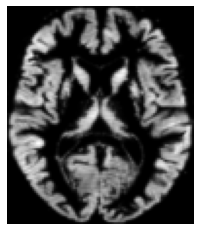

In [ ]:
my_test = np.load('/content/drive/My Drive/CC721519.npy')
plt.axis('off')
plt.imshow(my_test[:,:,48].T, cmap='gray', origin='lower')

print(trained_model.predict(my_test))